<img src="images/cads-logo.png" width=200 align=left>
<img src="images/python-logo.png" width=200 align=right>

# Pandas
- [Pandas](#Pandas)
- [Introduction to Pandas](#Introduction-to-Pandas)
- [Series](#Series)
    - [Initializing Series](#Initializing-Series)
    - [Selecting Elements](#Selecting-Elements)
        - [loc](#loc)
        - [iloc](#iloc)
    - [Combining Series](#Combining-Series)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
- [DataFrames](#DataFrames)
    - [Creating DataFrames](#Creating-DataFrames)
        - [Series as Rows](#Series-as-Rows)
        - [Series as Columns](#Series-as-Columns)
        - [Summary](#Summary)
    - [Pandas Pretty Print in Jupyter](#Pandas-Pretty-Print-in-Jupyter)
    - [Importing and Exporting Data](#Importing-and-Exporting-Data)
        - [Reading CSV](#Reading-CSV)
        - [Writing CSV](#Writing-CSV)
    - [Selecting Data](#Selecting-Data)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
        - [Exercise 4](#Exercise-4)
- [Data Processing](#Data-Processing)
    - [Aggregation](#Aggregation)
    - [Arithmetic](#Arithmetic)
    - [Grouping](#Grouping)
    - [Unique and Duplicate Values](#Unique-and-Duplicate-Values)
        - [unique](#unique)
        - [duplicate](#duplicate)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
        - [Exercise 4](#Exercise-4)
- [Merge Data Frames](#Merge-Data-Frames)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
- [Reshaping Data Frames](#Reshaping-Data-Frames)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Exercise 1](#Exercise-1)
    - [Exercise 2](#Exercise-2)
    - [Exercise 3](#Exercise-3)
    - [Exercise 4](#Exercise-4)
        - [Stacking and Unstacking Data Frames](#Stacking-and-Unstacking-Data-Frames)
    - [Exercise 5](#Exercise-5)
    - [Exercise 6](#Exercise-6)


## Introduction to Pandas

[Pandas](http://pandas.pydata.org/) is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Pandas is free software released under the three-clause BSD license. The name is derived from the term _panel data_, an econometrics term for multidimensional structured data sets.

At it's core, Pandas consists of NumPy arrays and additional functions to perform typical data analysis tasks.

**Resources**:  
* [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/index.html), especially
[10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Hernan Rojas' learn-pandas](https://bitbucket.org/hrojas/learn-pandas)  
* [Harvard CS109 lab1 content](https://github.com/cs109/2015lab1)

## Series
Series form the basis of Pandas. It is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. <u>Pandas Series is nothing but a column in an excel sheet</u>.

### Initializing Series
Series can be initialized from Python objects like lists or tuples. If only values are given, <u>Pandas generates default indices</u>.

In [2]:
#!conda install pandas
import pandas as pd
from IPython.display import display

In [3]:
pd

<module 'pandas' from '/Users/azharabhalim/opt/anaconda3/lib/python3.8/site-packages/pandas/__init__.py'>

In [4]:
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [5]:
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

Series can be mixed type

In [8]:
# Create a mixed series
mixed = [1, 2.0, "Three"]
print(pd.Series(mixed))
print()
print(type(mixed[0]))
print(type(mixed[1]))
print(type(mixed[2]))

0        1
1        2
2    Three
dtype: object

<class 'int'>
<class 'float'>
<class 'str'>


Series also support missing values via the `None` type.

In [11]:
#create a pandas series with None
#observe the dtype

animals = ['Tiger', 'Bear', None]
print(pd.Series(animals))
print("")
print(type(animals[0]))
print(type(animals[1]))
print(type(animals[2]))

0    Tiger
1     Bear
2     None
dtype: object

<class 'str'>
<class 'str'>
<class 'NoneType'>


In [14]:
# using the None keyword in list --> NaN in series

import numpy as np
numbers = [1, 2, np.nan, None]
print(pd.Series(numbers))
print("")
print(type(numbers[0]))
print(type(numbers[1]))
print(type(numbers[2]))
print(type(numbers[3]))

0    1.0
1    2.0
2    NaN
3    NaN
dtype: float64

<class 'int'>
<class 'int'>
<class 'float'>
<class 'NoneType'>


We can define custom keys during initialization.

In [15]:
# need to be careful with index. Index can be numbers.

sports = pd.Series(
    data  = ["Bhutan", "Scotland", 
             "Japan", "South Korea"], 
    index = ["1", "2", "3", "4"])
print(sports)

1         Bhutan
2       Scotland
3          Japan
4    South Korea
dtype: object


In [25]:
# need to be careful with index. 
# Index can be characters.

sports = pd.Series(
    data  = ["Bhutan", "Scotland", 
             "Japan", "South Korea"], 
    index = ["a", "b", "c", "d"])
print(sports)

a         Bhutan
b       Scotland
c          Japan
d    South Korea
dtype: object


Alternatively, Series can also be initialized with dictionaries. Indices are then generated from the dictionary keys.

In [20]:
# define our own dictionary

_dict_ = {
    'Archery': 'Bhutan',
    'Golf': 'Scotland',
    'Sumo': 'Japan',
    'Taekwondo': 'South Korea'
}

In [36]:
#create a pandas series from dictionary

sports = pd.Series(_dict_)
print(sports)

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object


We can list values and indices of series.

In [39]:
print(sports.index)
print(type(sports.index))

Index(['Archery', 'Golf', 'Sumo', 'Taekwondo'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [30]:
print(sports.values)
print(type(sports.values))

['Bhutan' 'Scotland' 'Japan' 'South Korea']
<class 'numpy.ndarray'>


Series type

In [31]:
type(sports)

pandas.core.series.Series

### Selecting Elements
As a result of iterative development of the Pandas library, there are several ways to select elements of a Series. Most of them are considered "legacy", however, and the best practice is to use `*.loc[...]` and `*.iloc[...]`. Take care to use the square brackets with `loc` and `iloc`, *not* the regular brackets as you would with functions.

In [33]:
sports[1]

'Scotland'

In [34]:
numbers[1]

2

#### loc
Select elements by their indices. If the index is invalid, either a `TypeError` or a `KeyError` will be thrown.

In [37]:
sports

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [38]:
print(sports.loc['Golf'])

Scotland


#### iloc
Select elements by their numerical IDs, i.e. the n-th element. 

In [40]:
sports

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [41]:
print(sports.iloc[1])

Scotland


If the indices were autogenerated then both loc and iloc seem to be identical. This is **NOT** always the case !!!

In [42]:
sports_noindex = pd.Series(sports.values)
print(sports_noindex)
print("")
print(sports_noindex.loc[0])
print(sports_noindex.iloc[0])

0         Bhutan
1       Scotland
2          Japan
3    South Korea
dtype: object

Bhutan
Bhutan


Take care to keep your code semantically correct, however. For example, if the series is resorted, the index of each element stays the same, but the ID changes!

In [43]:
# make sure you check the index sequence

sports_noindex_sorted = sports_noindex.sort_values()
print(sports_noindex_sorted)
print("")
print(sports_noindex_sorted.loc[1])
print(sports_noindex_sorted.iloc[1])

0         Bhutan
2          Japan
1       Scotland
3    South Korea
dtype: object

Scotland
Japan


If you want to select by index then use `loc`, if you want to select by ID then use `iloc`. Do not use them interchangeably just because they return the same results right now. This will eventually lead to bugs in your code.

### Combining Series
Series can be combined by appending one to another

In [44]:
# using the append command

s1 = pd.Series(["A", "B", "C"])
s2 = pd.Series(["D", "E", "F"])
print(s1)
print("")
print(s2)
print("")

s3 = s1.append(s2)
print(s3)

0    A
1    B
2    C
dtype: object

0    D
1    E
2    F
dtype: object

0    A
1    B
2    C
0    D
1    E
2    F
dtype: object


Notice the duplicate indices! Pandas permits this and selecting by `loc` will return **both** entries

In [45]:
print(s3.loc[0])


0    A
0    D
dtype: object


Using ``iloc`` will only return based on index

In [46]:
print(s3.iloc[0])


A


Also notice that if your selection of a Series results in a single entry, Pandas automatically converts it to its base type, i.e. a string in this case. If the selection consists of more than 1 entry, however, a Series is returned.

In [49]:
sports.loc['Golf']

'Scotland'

In [47]:
print(s3.loc[0])
print(type(s3.loc[0]))
print("")
print(s3.iloc[0])
print(type(s3.iloc[0]))

0    A
0    D
dtype: object
<class 'pandas.core.series.Series'>

A
<class 'str'>


### Exercises

#### Exercise 1
Create a pandas Series object from the following movie ratings
    
    The Avengers: 9.2
    Mr. Bean: 7.4
    Garfield: 2.1
    Star Wars The Force Awakens: 8.8

In [54]:
from pandas import Series
from numpy import float32

In [55]:
#1 list-list pairs

movies = Series(data = [9.2, 7.4, 2.1, 8.8], 
                index = ['The Avengers', 'Mr. Bean', 
                         'Garfield', 
                         'Star Wars The Force Awakens'], 
                name = 'ratings', # optional
                dtype = float32) # optional
print(movies)

The Avengers                   9.2
Mr. Bean                       7.4
Garfield                       2.1
Star Wars The Force Awakens    8.8
Name: ratings, dtype: float32


In [56]:
#2 dictionary

movies = Series(
    data = {'The Avengers': 9.2, 
            'Mr. Bean': 7.4, 
            'Garfield': 2.1, 
            'Star Wars The Force Awakens': 8.8}, 
    name = 'ratings', # optional
    dtype = float32 # optional
)
print(movies)

The Avengers                   9.2
Mr. Bean                       7.4
Garfield                       2.1
Star Wars The Force Awakens    8.8
Name: ratings, dtype: float32


#### Exercise 2
Select the rating for the movie 'Garfield'.

In [57]:
# recommended / preferred way

movies.loc['Garfield']

2.1

In [59]:
# not recommended / avoid! / prone to bug

movies['Garfield']

2.1

In [60]:
# not recommended / prone to bug

movies.iloc[2]

2.1

#### Exercise 3
Select the **index** of the 2$^{nd}$ entry

In [62]:
movies.index[1]

'Mr. Bean'

## DataFrames

Multiple series with common indices can form a data frame. A data frame is like a table, with rows and columns (e.g., as in SQL or Excel).

|  .   | Animal | Capital |
| --- | --- | --- |
| India | a | b |
| Sweden | a | b |

Each row usually denotes an entry in our data and each column a feature we're interested in.

### Creating DataFrames

#### Series as Columns
We can also create data frames column-wise

In [63]:
col1 = pd.Series({"India": "Elephant", 
                  "Sweden": "Reindeer"})
col2 = pd.Series({"India": "New Delhi", 
                  "Sweden": "Stockholm"})
print(col1)
print()
print(col2)

India     Elephant
Sweden    Reindeer
dtype: object

India     New Delhi
Sweden    Stockholm
dtype: object


In [64]:
df = pd.DataFrame(
    data = {"Animal": col1, 
            "Capital": col2}
)
df

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


Pandas' flexibility lets us cut out the middle man and use nested dictionaries. The keys of the outer dictionary become the column names and those of the inner dictionary become the row names.

In [68]:
df = pd.DataFrame({
    "Animal": {
        "India": "Elephant",
        "Sweden": "Reindeer", 
        "Malaysia": "Rimau"
    },
    "Capital": {
        "India": "New Delhi",
        "Sweden": "Stockholm"}})
df

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm
Malaysia,Rimau,NaN


### Another Approach using Paired-Lists in Dictionary

In [71]:
df = pd.DataFrame(
    data = {
        'Animal': ['Elephant','Reindeer', 'Rimau'],
        'Capital': ['New Delhi','Stockholm', np.nan]
    }, 
    index = ['India','Sweden', 'Malaysia']
)

df

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm
Malaysia,Rimau,NaN


#### Summary
Series are pasted together to become data frames. They can be pasted as:
- rows: `data=[series1, series2, ...]`
- columns: `data={"Column Name 1": series1, "Column Name 2": series2, ...}`

We can use the same `*.index()` and `*.values()` functions as for Series

In [72]:
print(df.index)
print(df.columns)
print(df.values)

Index(['India', 'Sweden', 'Malaysia'], dtype='object')
Index(['Animal', 'Capital'], dtype='object')
[['Elephant' 'New Delhi']
 ['Reindeer' 'Stockholm']
 ['Rimau' nan]]


### Pandas Pretty Print in Jupyter
Jupyter has a 'pretty print' option for Pandas dataframes. Using `print` will print the dataframes in Jupyter as they would appear in a standard console. But leaving it away or using IPython's `display` function will render them as HTML tables

In [73]:
print(df)

            Animal    Capital
India     Elephant  New Delhi
Sweden    Reindeer  Stockholm
Malaysia     Rimau        NaN


In [78]:
# from IPython.display import display
display(df)

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm
Malaysia,Rimau,NaN


Jupyter allows a shortcut for the `display` function. If we execute a Python command or line of code that results in a data frame, Jupyter will assume we want to display it and do so using its built-in function. Note, however, that it will only ever do this with the last relevant line in each cell.

In [79]:
display(df)
display(df*2)

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm
Malaysia,Rimau,NaN


,Animal,Capital
India,ElephantElephant,New DelhiNew Delhi
Sweden,ReindeerReindeer,StockholmStockholm
Malaysia,RimauRimau,NaN


### Importing and Exporting Data
Most often we don't create data within our code but read it from external sources. Pandas has a large collection of importing (and corresponding exporting) functions available.

| Data | Reader | Writer |
| --- | --- | --- |
| CSV | `read_csv` | `to_csv` |
| JSON | `read_json` | `to_json` |
| HTML | `read_html` | `to_html` |
| Local clipboard | `read_clipboard` | `to_clipboard` |
| Excel | `read_excel` | `to_excel` |
| HDF5 | `read_hdf` | `to_hdf` |
| Feather | `read_feather` | `to_feather` |
| Parquet | `read_parquet` | `to_parquet` |
| Msgpack | `read_msgpack` | `to_msgpack` |
| Stata | `read_stata` | `to_stata` |
| SAS | `read_sas` |  |
| Python Picke Format | `read_pickle` | `to_pickle` |
| SQL | `read_sql` | `to_sql` |
| Google Big Query | `read_gbq` | `to_gbq` |

http://pandas.pydata.org/pandas-docs/stable/io.html

#### Reading CSV
We will read a tabular CSV file as an example.

In [80]:
cars = pd.read_csv("data/cars.csv")
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


We can also define one of the columns as an index column using either the column header (if it exists) or the column ID (remember, Python starts counting at 0)

In [81]:
cars = pd.read_csv("data/cars.csv", 
                   index_col="model")

# Use head() to print only the first few lines
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [82]:
cars = pd.read_csv("data/cars.csv", index_col=0)
cars.head(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


#### Writing CSV
Writing CSV files is as straightforward as it gets. Notice that these functions are now methods of the specific objects, not of base Pandas

In [83]:
# !ls
# For windows:
!dir

Pictures             Python_Day6_SC.ipynb example
Python_Day4_SC.ipynb Untitled.ipynb       images
Python_Day5_SC.ipynb data


In [84]:
cars.to_csv("cars2.csv")

In [85]:
!dir

Pictures             Python_Day6_SC.ipynb data
Python_Day4_SC.ipynb Untitled.ipynb       example
Python_Day5_SC.ipynb cars2.csv            images


### Selecting Data
Selecting data from Pandas arrays works just as it did for NumPy arrays, except that `loc` and `iloc` are necessary.

In [86]:
cars.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [92]:
# row with index no. 9

cars.iloc[[9]]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4


In [93]:
# row with index 4 to 6

cars.iloc[4:7]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4


In [94]:
# skip 2

cars.iloc[1:9:2]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


As with Series, we can also select items by their index names.

In [102]:
# select row with index = "Datsun 710"

cars = pd.read_csv("data/cars.csv", index_col="model")

cars.loc[["Datsun 710"]]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1


In [98]:
# select 2 rows

cars.loc[["Datsun 710", "Ferrari Dino"]]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
Ferrari Dino,19.7,6,145.0,175,3.62,2.77,15.50,0,1,5,6


Notice how a single entry is shown as a series but multiple entries as a data frame. This is analogous to how a single entry of a series is shown as a base type and multiple entries as a smaller series

<br><center><b>Base Type --> Series --> Data Frame</b></center>

Selecting columns can be done just as with dictionaries except that we can select multiple Pandas columns simultaneously. As with row selection, selecting a single column results in a Series object but selecting multiple columns results in a new DataFrame object.

In [103]:
cars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [105]:
cars['mpg']

model
Mazda RX4              21.0
Mazda RX4 Wag          21.0
Datsun 710             22.8
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              24.4
Merc 230               22.8
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               32.4
Honda Civic            30.4
Toyota Corolla         33.9
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              27.3
Porsche 914-2          26.0
Lotus Europa           30.4
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora          15.0
Volvo 142E             21.4
Name: mpg, dtype: float64

In [108]:
# select columns  

cars[['mpg']]

,mpg
model,
Mazda RX4,21.0
Mazda RX4 Wag,21.0
Datsun 710,22.8
Hornet 4 Drive,21.4
Hornet Sportabout,18.7
Valiant,18.1
Duster 360,14.3
Merc 240D,24.4
Merc 230,22.8


In [107]:
# select 2 columns.

cars[["disp", "wt"]].head()

model
Mazda RX4            160.0
Mazda RX4 Wag        160.0
Datsun 710           108.0
Hornet 4 Drive       258.0
Hornet Sportabout    360.0
Name: disp, dtype: float64

In [110]:
cars.wt

model
Mazda RX4              2.620
Mazda RX4 Wag          2.875
Datsun 710             2.320
Hornet 4 Drive         3.215
Hornet Sportabout      3.440
Valiant                3.460
Duster 360             3.570
Merc 240D              3.190
Merc 230               3.150
Merc 280               3.440
Merc 280C              3.440
Merc 450SE             4.070
Merc 450SL             3.730
Merc 450SLC            3.780
Cadillac Fleetwood     5.250
Lincoln Continental    5.424
Chrysler Imperial      5.345
Fiat 128               2.200
Honda Civic            1.615
Toyota Corolla         1.835
Toyota Corona          2.465
Dodge Challenger       3.520
AMC Javelin            3.435
Camaro Z28             3.840
Pontiac Firebird       3.845
Fiat X1-9              1.935
Porsche 914-2          2.140
Lotus Europa           1.513
Ford Pantera L         3.170
Ferrari Dino           2.770
Maserati Bora          3.570
Volvo 142E             2.780
Name: wt, dtype: float64

Alternatively, we can also use the `*.loc`/`.*iloc` syntax. In this case, we have to include both the row and column indices to select. As with base Python, the color `:` instructs Pandas to select all rows or columns

In [111]:
# select column = 'disp'

cars[["disp"]]

,disp
model,
Mazda RX4,160.0
Mazda RX4 Wag,160.0
Datsun 710,108.0
Hornet 4 Drive,258.0
Hornet Sportabout,360.0
Valiant,225.0
Duster 360,360.0
Merc 240D,146.7
Merc 230,140.8


In [113]:
# select a particular cell only...

cars.loc["Mazda RX4", "disp"]

160.0

In [114]:
cars.loc[['Datsun 710','Mazda RX4']]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
Mazda RX4,21.0,6,160.0,110,3.90,2.62,16.46,0,1,4,4


In [117]:
cars.loc[['Datsun 710','Mazda RX4'], 
         ['mpg', 'cyl']]

,mpg,cyl
model,,
Datsun 710,22.8,4
Mazda RX4,21.0,6


Take note that if we want to mix ID and index selection, we need to chain together `loc` and `iloc` calls. There is no way to combine this into a single index tuple.

In [118]:
display(cars.iloc[[4]])
print()
print(cars.iloc[4]['mpg'])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2



18.7


In [124]:
np.array([[1, 2, 3], 
          [4, 5, 6], 
          [7, 8, 9]])[  :  ,  1   ]

array([2, 5, 8])

In [125]:
display(cars.loc[:, ["mpg"]])
print()
print(cars.loc[:, 'mpg'].iloc[4])

,mpg
model,
Mazda RX4,21.0
Mazda RX4 Wag,21.0
Datsun 710,22.8
Hornet 4 Drive,21.4
Hornet Sportabout,18.7
Valiant,18.1
Duster 360,14.3
Merc 240D,24.4
Merc 230,22.8



18.7


We can see the names of all columns with the `columns` property (notice that this is also an index object, just as the row names is).

In [126]:
print(cars.columns)
print(cars.index)

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')
Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object', name='model')


We can also use boolean masks to select rows or columns, i.e.

```python
cars.loc[[True, True, False, True, False, ...]]
```

However, as we're dealing with large datasets, typing them out by hand is suboptimal. So let's use some simple boolean conditions instead.

In [127]:
# Pandas applies the operation to each individual entry

cars["mpg"] > 25

model
Mazda RX4              False
Mazda RX4 Wag          False
Datsun 710             False
Hornet 4 Drive         False
Hornet Sportabout      False
Valiant                False
Duster 360             False
Merc 240D              False
Merc 230               False
Merc 280               False
Merc 280C              False
Merc 450SE             False
Merc 450SL             False
Merc 450SLC            False
Cadillac Fleetwood     False
Lincoln Continental    False
Chrysler Imperial      False
Fiat 128                True
Honda Civic             True
Toyota Corolla          True
Toyota Corona          False
Dodge Challenger       False
AMC Javelin            False
Camaro Z28             False
Pontiac Firebird       False
Fiat X1-9               True
Porsche 914-2           True
Lotus Europa            True
Ford Pantera L         False
Ferrari Dino           False
Maserati Bora          False
Volvo 142E             False
Name: mpg, dtype: bool

In [128]:
# Use loc, not iloc, to select based on boolean masks

cars.loc[cars["mpg"] > 25]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


We can also select specific rows of certain columns with boolean masks.

In [129]:
# select specific columns

cars.loc[cars["mpg"] > 25   , ["hp", "disp"]]

,hp,disp
model,,
Fiat 128,66,78.7
Honda Civic,52,75.7
Toyota Corolla,65,71.1
Fiat X1-9,66,79.0
Porsche 914-2,91,120.3
Lotus Europa,113,95.1


In [130]:
# select specific cell...

cars.loc[0, 'model']

KeyError: 0

In [136]:
# select specific cell...

cars.iloc[0]['mpg']

21.0

### Exercises
Familiarize yourselves with data frame creation and handling.

#### Exercise 1
Manually create a dataframe from the following data. <br><u>**EmployeeID** should be the index of the dataframe</u>. Try using different methods (e.g. nested dictionaries, list of lists, series objects as rows or columns)


EmployeeID | EmployeeName | Salary | Department
---------- | ------------ | ------ | ----------
2044       | James        |  2500  | Finance
1082       | Hannah       | 4000   | Sales
7386       | Victoria     | 3700   | IT

In [137]:
from pandas import Series, DataFrame

In [140]:
# nested dictionaries
employees = DataFrame(
    data = {
        'EmployeeName': {2044: 'James', 
                         1082: 'Hannah', 
                         7386: 'Victoria'}, 
        'Salary': {2044: 2500, 1082: 4000, 7386: 3700}, 
        'Department': {2044: 'Finance', 
                       1082: 'Sales', 
                       7386: 'IT'}
    }
)

employees.index.name = 'EmployeeID'

employees


,EmployeeName,Salary,Department
EmployeeID,,,
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [154]:
employees = DataFrame(
    {"EmployeeID": [2044,1082,7336], 
     "EmployeeName": ['James','Hannah','Victoria'], 
     'Salary': [2500,4000,3700], 
     'Department': ['Finance','Sales','IT']}
)

employees.set_index('EmployeeID', drop = True, 
                    inplace = True)
employees

,EmployeeName,Salary,Department
EmployeeID,,,
2044,James,2500,Finance
1082,Hannah,4000,Sales
7336,Victoria,3700,IT


In [151]:
employees = DataFrame(
    data = [['James'  , 2500, 'Finance'], 
            ['Hannah' , 4000, 'Sales'  ], 
            ['Vitoria', 3700, 'IT'     ]], 
    columns = ['EmployeeName', 'Salary', 'Department'], 
    index = Series([2044, 1082, 7386], 
                   name = 'EmployeeID')
)
employees

,EmployeeName,Salary,Department
EmployeeID,,,
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Vitoria,3700,IT


#### Exercise 2
Read in the chocolate.csv data set and display the first 8 lines

In [155]:
from pandas import read_csv

In [176]:
chocs = read_csv('data/chocolate.csv')
chocs.head(8)

,Company,Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Country of Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela


#### Exercise 3
Select only the chocolates with "Congo" as the country of origin and show only the rating, the cocoa percent, and the country of origin (to make sure we've selected the right products)

In [158]:
chocs.loc[
    chocs['Country of Origin'] == 'Congo', 
    ['Rating', 'Cocoa Percent', 'Country of Origin']
]

,Rating,Cocoa Percent,Country of Origin
136,3.75,72%,Congo
213,3.50,82%,Congo
308,3.50,70%,Congo
403,3.50,68%,Congo
1202,3.75,70%,Congo
1233,3.00,70%,Congo
1357,2.75,75%,Congo
1654,3.25,65%,Congo
1788,3.25,68%,Congo
1791,3.00,65%,Congo


In [159]:
chocs.loc[chocs['Country of Origin'] == 'Congo']\
[['Rating', 'Cocoa Percent', 'Country of Origin']]

,Rating,Cocoa Percent,Country of Origin
136,3.75,72%,Congo
213,3.50,82%,Congo
308,3.50,70%,Congo
403,3.50,68%,Congo
1202,3.75,70%,Congo
1233,3.00,70%,Congo
1357,2.75,75%,Congo
1654,3.25,65%,Congo
1788,3.25,68%,Congo
1791,3.00,65%,Congo


#### Exercise 4
Oh no! There was a mistake in the data entry. One of the products has a missing country of origin. Please find it, replace it with "Venezuela", and save the fixed data frame as "chocolate_fixed.csv"

  - You can use `*.isna()` to identify which entry of a series is either `NaN` or `None`, e.g. `mySeries.isna()`
  - You can assign values to data frames just like you would to lists, e.g. `df.iloc[0, 5] = 15`

In [161]:
chocs["Country of Origin"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1790    False
1791    False
1792    False
1793    False
1794    False
Name: Country of Origin, Length: 1795, dtype: bool

In [177]:
chocs.loc[chocs["Country of Origin"].isna()]

,Company,Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Country of Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN


In [171]:
chocs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1795 non-null   object 
 1   Bean Origin or Bar Name  1795 non-null   object 
 2   REF                      1795 non-null   int64  
 3   Review Date              1795 non-null   int64  
 4   Cocoa Percent            1795 non-null   object 
 5   Company Location         1795 non-null   object 
 6   Rating                   1795 non-null   float64
 7   Bean Type                1794 non-null   object 
 8   Country of Origin        1795 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [164]:
chocs.loc[
    chocs["Country of Origin"].isna(), 
    'Country of Origin'
] = 'Venezuela'


In [165]:
# check the record to confirm changed to Venezuela
chocs.loc[1072]

Company                    Mast Brothers
Bean Origin or Bar Name       Madagascar
REF                                  999
Review Date                         2012
Cocoa Percent                        72%
Company Location                  U.S.A.
Rating                               2.5
Bean Type                     Trinitario
Country of Origin              Venezuela
Name: 1072, dtype: object

In [170]:
chocs.to_csv('chocolate_fixed.csv', index = False)

In [ ]:
chocs['Country of Origin'].fillna()

In [180]:
from numpy import nan
chocs['Country of Origin'] = chocs['Country of Origin'].replace(
    to_replace = nan, value = 'Venezuela'
)

In [181]:
chocs.loc[1072]

Company                    Mast Brothers
Bean Origin or Bar Name       Madagascar
REF                                  999
Review Date                         2012
Cocoa Percent                        72%
Company Location                  U.S.A.
Rating                               2.5
Bean Type                     Trinitario
Country of Origin              Venezuela
Name: 1072, dtype: object

## Data Processing
Pandas contains many functions to process and transform data. These can be called either on data frames or individual series. Describing every function in detail is far too time-consuming and application-dependent. A thorough list and description of *all* Pandas functionality can be found here: https://pandas.pydata.org/pandas-docs/stable/api.html

Many of the functions are more or less self-explanatory and/or well-documented

In [182]:
chocs.shape

(1795, 9)

### Aggregation

In [183]:
numbers = pd.Series([1, 2, 3, 4, 5, 5, 6, 6, 6])
print(numbers.sum())
print(numbers.mean())
print(numbers.max())
print(numbers.min())
print(numbers.idxmax())
print(numbers.idxmin())

38
4.222222222222222
6
1
6
0


Functions can be applied to series or data.frames. In the case of data frames, they are applied to each row or column individually

In [186]:
df = pd.DataFrame([[1,1,1], [2,2,2], [3,3,3]], 
                  index = ['row1', 'row2', 'row3'], 
                  columns = ['col1', 'col2', 'col3'])
df

,col1,col2,col3
row1,1,1,1
row2,2,2,2
row3,3,3,3


In [187]:
# Sum by column

df.sum()

col1    6
col2    6
col3    6
dtype: int64

In [194]:
# Sum by row

df.sum(axis = 'columns')

row1    3
row2    6
row3    9
dtype: int64

In [189]:
# check for each column, which index has the max value

df.idxmax(axis = 1)

row1    col1
row2    col1
row3    col1
dtype: object

We can decide whether the aggregation should occur along columns or rows. Note however, that the syntax is confusing. `axis=X` indicates along which dimension the function will "travel". For example, `axis=columns` indicates that all columns will be collapsed into the function, and the function will be applied to individual rows. Likewise, `axis=rows` means that the function will travel along rows and compute the aggregate value for each column individually.

In [195]:
# sum the value for each column.
print(df.sum(axis = 'columns'))
print(df.sum())


row1    3
row2    6
row3    9
dtype: int64
col1    6
col2    6
col3    6
dtype: int64


In [196]:
# sum the value for each row.
print(df.sum(axis = 'rows'))


col1    6
col2    6
col3    6
dtype: int64


The most important aggregation function is `*.apply()`, which applies an arbitrary function to each row/column. 

In [197]:
display(df)

,col1,col2,col3
row1,1,1,1
row2,2,2,2
row3,3,3,3


In [199]:
df.apply(lambda row: sum(row**2), axis = 'columns')

row1     3
row2    12
row3    27
dtype: int64

In [200]:
def sum_squared(_series): 
    return sum(_series**2)

df.apply(sum_squared, axis = 'columns')

row1     3
row2    12
row3    27
dtype: int64

`*.apply()` is slower than the built-in functions, so should not be used for simple operations that can also be solved with direct operations on data frames.

In [201]:
df = pd.DataFrame([[1,1,1], [2,2,2], [3,3,3]])

%timeit df.apply(lambda x: sum(x**2))
%timeit (df**2).sum()

1.82 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
711 µs ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Also take care that the function will be applied to all columns, regardless of type. The built-in functions are clever enough to skip columns for which they are not defined.

In [203]:
df = pd.DataFrame({
    "Age": [10, 12, 12], 
    "Name": ["Liz", "John", "Sam"]})
df.sum()

# Uncomment for exception
# df.apply(lambda x: sum(x**2), axis="rows")

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [205]:
df = pd.DataFrame({
    "Age": [10, 12, '12'], 
    "Name": ["Liz", "John", "Sam"]})
df.sum()

Series([], dtype: float64)

### Arithmetic
We can also perform element-wise operations on dataframe columns or rows, e.g.

In [206]:
df = pd.DataFrame(data = [[1, 2, 3], 
                          [4, 5, 6], 
                          [7, 8, 9]], 
                  columns = ["ColA", "ColB", "ColC"],
                  index = ["RowA", "RowB", "RowC"])
df

,ColA,ColB,ColC
RowA,1,2,3
RowB,4,5,6
RowC,7,8,9


In [207]:
df["ColA"] + df["ColB"]

RowA     3
RowB     9
RowC    15
dtype: int64

In [209]:
df.ColA + df.ColB

RowA     3
RowB     9
RowC    15
dtype: int64

In [208]:
df['ColA'] + df['RowA']

KeyError: 'RowA'

In [210]:
# Pandas is smart enough to convert our list 
# into a series and then add the two columns 
# element-wise

df["ColA"] + [10, 11, 12]

RowA    11
RowB    15
RowC    19
Name: ColA, dtype: int64

In [212]:
df.loc['RowA']

ColA    1
ColB    2
ColC    3
Name: RowA, dtype: int64

In [213]:
df.loc['RowB']

ColA    4
ColB    5
ColC    6
Name: RowB, dtype: int64

In [211]:
# Remember, both rows AND columns can be represented 
# as Pandas series

df.loc["RowA"] * df.loc["RowB"]

ColA     4
ColB    10
ColC    18
dtype: int64

Pandas adheres to the same broadcasting rules as NumPy

In [214]:
df = pd.DataFrame(data = [[1,2], 
                          [3,4], 
                          [5,6]], 
                  columns = ["ColA", "ColB"], 
                  index = ["RowA", "RowB", "RowC"])
df

,ColA,ColB
RowA,1,2
RowB,3,4
RowC,5,6


In [215]:
df * 2

,ColA,ColB
RowA,2,4
RowB,6,8
RowC,10,12


In [216]:
df * [1, -1]

,ColA,ColB
RowA,1,-2
RowB,3,-4
RowC,5,-6


In [224]:
display(df)
display(
    df * np.array([[6, 5], 
                   [4, 3], 
                   [2, 1]])
)

,ColA,ColB
RowA,1,2
RowB,3,4
RowC,5,6


,ColA,ColB
RowA,6,10
RowB,12,12
RowC,10,6


In [225]:
# the row with index = 'RowA'

df.loc["RowA"] / 5

ColA    0.2
ColB    0.4
Name: RowA, dtype: float64

In [226]:
df["ColB"] ** 3

RowA      8
RowB     64
RowC    216
Name: ColB, dtype: int64

### Grouping
A core functionality of Pandas is the ability to group data frames and apply functions to each individual group. The function `*.groupby(...)` defines groups based on common labels. Aggregators applied to this grouped data frame are then applied to each group individually.

In [230]:
df = pd.DataFrame({
    "Height": [178, 182, 158, 167, 177, 174, 175, 185], 
    "Age": [24, 33, 32, 18, 21, 28, 22, 29],
    "Gender": ["M", "M", "F", "F", "M", "F", "M", "F"]})
display(df)

display(df.groupby('Gender').mean())
display(df.mean())


,Height,Age,Gender
0,178,24,M
1,182,33,M
2,158,32,F
3,167,18,F
4,177,21,M
5,174,28,F
6,175,22,M
7,185,29,F


,Height,Age
Gender,,
F,171.0,26.75
M,178.0,25.00


Height    174.500
Age        25.875
dtype: float64

We can also select columns without disturbing the grouping

In [236]:
# grouping...

df.groupby('Gender')['Height'].mean()

Gender
F    171
M    178
Name: Height, dtype: int64

<AxesSubplot:ylabel='Gender'>

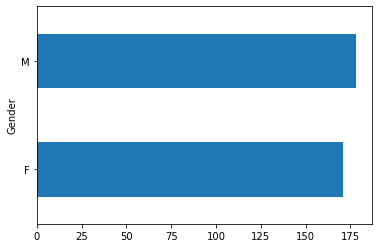

In [237]:
df.groupby('Gender')['Height'].mean()\
.plot(kind = 'barh');

A useful function is `size()`, which counts how large each of the groups is.

In [240]:
df.shape

(8, 3)

In [238]:
# size is actually calculating the number of M and F

df.groupby("Gender").size()

Gender
F    4
M    4
dtype: int64

### Unique and Duplicated Values
Two functions can help us identify unique and duplicated values within Series objects. They are aptly names `unique()` and `duplicated()`, respectively. 

#### unique
`*.unique()` returns only unique values of a Series object.

In [242]:
{1, 2, 3, 2, 3, 4, 3, 5}

{1, 2, 3, 4, 5}

In [241]:
s = pd.Series([1,2,3,2,3,4,3,5])
s.unique()

array([1, 2, 3, 4, 5])

#### duplicated
`*.duplicated()` identifies duplicated values in Series objects and returns a boolean Series. Entries that have already been seen are marked as `True` while new values are marked as `False`.

In [246]:
s = pd.Series([1,2,3,2,3,4,3,5])
s.loc[~s.duplicated(keep = False)]

0    1
5    4
7    5
dtype: int64

When applied to Dataframes, `duplicated()` compares **ENTIRE ROWS** for duplicates.

In [247]:
df = pd.DataFrame([
    ["Dog", 5], 
    ["Cat", 4], 
    ["Dog", 5], 
    ["Fish", 2], 
    ["Cat", 8]], 
    columns=["Animal", "Age"])
display(df)
display(df.duplicated())

,Animal,Age
0,Dog,5
1,Cat,4
2,Dog,5
3,Fish,2
4,Cat,8


0    False
1    False
2     True
3    False
4    False
dtype: bool

To remove duplicated rows from a data frame we could therefore do the following (just like in NumPy, booleans are negated with `~`)

In [255]:
display(df)
~df.duplicated(keep = 'first')

,Animal,Age
0,Dog,5
1,Cat,4
2,Dog,5
3,Fish,2
4,Cat,8


0     True
1     True
2    False
3     True
4     True
dtype: bool

In [258]:
df.loc[~df.duplicated()]

,Animal,Age
0,Dog,5
1,Cat,4
3,Fish,2
4,Cat,8


In [263]:
# get the unique values in a column

df.Animal.unique().tolist()

['Dog', 'Cat', 'Fish']

### Exercises

#### Exercise 1
Load the "cars.csv" dataframe and calculate the average miles per gallon (column "mpg")

In [265]:
from pandas import read_csv
cars = read_csv('data/cars.csv')

In [267]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [268]:
## preferred
cars.mpg.mean()

20.090624999999996

In [269]:
## preferred 
cars['mpg'].mean()

20.090624999999996

In [270]:
cars.mean().mpg

20.090624999999996

#### Exercise 2
Cars can have 4, 6, or 8 cylinders (column "cyl"). Find the mean miles per gallon (column "mpg") for each of these classes **without** using the `groupby(...)` function.

*BONUS: Write a function that takes the number of cylinders and returns the mean miles per gallon.*

In [273]:
# 4 cyl
print(4, 'cyl', 
      cars.loc[cars['cyl'] == 4, 'mpg'].mean())

# 6 cyl
print(6, 'cyl', 
      cars.loc[cars['cyl'] == 6, 'mpg'].mean())

# 8 cyl
print(8, 'cyl', 
      cars.loc[cars['cyl'] == 8, 'mpg'].mean())

4 cyl 26.663636363636364
6 cyl 19.74285714285714
8 cyl 15.100000000000003


In [274]:
def avg_mpg_per_cyl(cyl): 
    return cars.loc[cars['cyl'] == cyl, 'mpg'].mean()

In [279]:
avg_mpg_per_cyl(4)

26.663636363636364

#### Exercise 3
Repeat the above exercise but this time make use of the `groupby(...)` function.

In [281]:
cars.groupby('cyl').mpg.mean()

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

In [283]:
cars.groupby('cyl').mpg.mean().to_frame()

,mpg
cyl,
4,26.663636
6,19.742857
8,15.100000


In [284]:
cars.groupby('cyl')[['mpg']].mean()

,mpg
cyl,
4,26.663636
6,19.742857
8,15.100000


In [286]:
cars.groupby('cyl', as_index = False)[['mpg']].mean()

,cyl,mpg
0,4,26.663636
1,6,19.742857
2,8,15.100000


In [292]:
cars.groupby('cyl')['mpg'].mean().reset_index()

,cyl,mpg
0,4,26.663636
1,6,19.742857
2,8,15.100000


#### Exercise 4
Your client has a proprietary metric for car engine quality that is calculated as $Q = \frac{hp}{wt^2}$. Calculate this metric for all cars and then find the average for cars with a manual (column "am" == 1) or automatic (column "am" == 0) transmission.

**HINT** You can add the new metric as a column to your data frame via `cars["q_metric'] = ...`. Assignments to unknown column (or row) index names will result in new columns (or rows) to be appended to the data frame.

In [295]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [296]:
cars['q_metric'] = cars.hp / cars.wt ** 2

In [299]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,q_metric
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,16.024707
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,13.308129
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,17.278537
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,10.642183
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,14.788399


In [300]:
cars.groupby('am').q_metric.mean()

am
0    11.490145
1    21.216699
Name: q_metric, dtype: float64

## Merge Data Frames
Pandas data frames can be treated like SQL tables and joined.

In [301]:
sales = pd.DataFrame({
    "Date": pd.date_range(start="2018-10-01", end="2018-10-07"), 
    "ItemID": ["A401", "C776", "A401", "FY554", "Y98R", "Y98R", "FY554"]})
sales

,Date,ItemID
0,2018-10-01,A401
1,2018-10-02,C776
2,2018-10-03,A401
3,2018-10-04,FY554
4,2018-10-05,Y98R
5,2018-10-06,Y98R
6,2018-10-07,FY554


In [302]:
item_info = pd.DataFrame({
    "ID": ["A401", "C776", "FY554", "Y98R"],
    "Name": ["Toaster", "Vacuum Cleaner", "Washing Machine", "Clothes Iron"], 
    "Price": [25, 220, 540, 85]})
item_info

,ID,Name,Price
0,A401,Toaster,25
1,C776,Vacuum Cleaner,220
2,FY554,Washing Machine,540
3,Y98R,Clothes Iron,85


In [303]:
sales.merge(
    right = item_info, 
    how = "inner", 
    left_on = "ItemID", 
    right_on = "ID"
)

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25
1,2018-10-03,A401,A401,Toaster,25
2,2018-10-02,C776,C776,Vacuum Cleaner,220
3,2018-10-04,FY554,FY554,Washing Machine,540
4,2018-10-07,FY554,FY554,Washing Machine,540
5,2018-10-05,Y98R,Y98R,Clothes Iron,85
6,2018-10-06,Y98R,Y98R,Clothes Iron,85


Merge types:
- **Inner**: keep only rows with corresponding IDs found in *both* data frames
- **Left**: use only rows with IDs found in the left data frame
- **Right**: use only rows with IDs found in the right data frame
- **Outer**: use all keys that are in at least one of the data frames. This is essentially the combination of left and right joins

Missing data will be replaced by `NaN` values

In [304]:
sales = pd.DataFrame({
    "Date": pd.date_range(start="2018-10-01", end="2018-10-07"), 
    "ItemID": ["A401", "ZZZC776", "A401", "ZZZFY554", "Y98R", "Y98R", "FY554"]})
display(sales)
item_info = pd.DataFrame({
    "ID": ["A401", "C776", "FY554", "Y98R", "U1776"],
    "Name": ["Toaster", "Vacuum Cleaner", "Washing Machine", "Clothes Iron", "Computer"], 
    "Price": [25, 220, 540, 85, 899]})
display(item_info)

,Date,ItemID
0,2018-10-01,A401
1,2018-10-02,ZZZC776
2,2018-10-03,A401
3,2018-10-04,ZZZFY554
4,2018-10-05,Y98R
5,2018-10-06,Y98R
6,2018-10-07,FY554


,ID,Name,Price
0,A401,Toaster,25
1,C776,Vacuum Cleaner,220
2,FY554,Washing Machine,540
3,Y98R,Clothes Iron,85
4,U1776,Computer,899


In [305]:
sales.merge(
    right = item_info, how = 'inner', 
    left_on = 'ItemID', right_on = 'ID'
)

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25
1,2018-10-03,A401,A401,Toaster,25
2,2018-10-05,Y98R,Y98R,Clothes Iron,85
3,2018-10-06,Y98R,Y98R,Clothes Iron,85
4,2018-10-07,FY554,FY554,Washing Machine,540


In [306]:
sales.merge(
    right = item_info, how = 'left', 
    left_on = 'ItemID', right_on = 'ID'
)

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25.0
1,2018-10-02,ZZZC776,NaN,NaN,NaN
2,2018-10-03,A401,A401,Toaster,25.0
3,2018-10-04,ZZZFY554,NaN,NaN,NaN
4,2018-10-05,Y98R,Y98R,Clothes Iron,85.0
5,2018-10-06,Y98R,Y98R,Clothes Iron,85.0
6,2018-10-07,FY554,FY554,Washing Machine,540.0


In [307]:
sales.merge(
    right = item_info, how = 'right', 
    left_on = 'ItemID', right_on = 'ID'
)

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25
1,2018-10-03,A401,A401,Toaster,25
2,NaT,NaN,C776,Vacuum Cleaner,220
3,2018-10-07,FY554,FY554,Washing Machine,540
4,2018-10-05,Y98R,Y98R,Clothes Iron,85
5,2018-10-06,Y98R,Y98R,Clothes Iron,85
6,NaT,NaN,U1776,Computer,899


In [308]:
sales.merge(
    right = item_info, how = 'outer', 
    left_on = 'ItemID', right_on = 'ID'
)

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25.0
1,2018-10-03,A401,A401,Toaster,25.0
2,2018-10-02,ZZZC776,NaN,NaN,NaN
3,2018-10-04,ZZZFY554,NaN,NaN,NaN
4,2018-10-05,Y98R,Y98R,Clothes Iron,85.0
5,2018-10-06,Y98R,Y98R,Clothes Iron,85.0
6,2018-10-07,FY554,FY554,Washing Machine,540.0
7,NaT,NaN,C776,Vacuum Cleaner,220.0
8,NaT,NaN,U1776,Computer,899.0


In [311]:
sales.Date

0   2018-10-01
1   2018-10-02
2   2018-10-03
3   2018-10-04
4   2018-10-05
5   2018-10-06
6   2018-10-07
Name: Date, dtype: datetime64[ns]

In [313]:
type(sales.merge(
    right = item_info, how = 'outer', 
    left_on = 'ItemID', right_on = 'ID'
).loc[8].Date)

pandas._libs.tslibs.nattype.NaTType

We can also merge on indices, either of one or both of the data frames

In [314]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [315]:
df1 = df1.set_index("employee")
df2 = df2.set_index("employee")
display(df1, df2)

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [316]:
df1.merge(df2, 
          left_index = True, 
          right_index = True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [317]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df2 = df2.set_index("employee")
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [318]:
df1.merge(df2, 
          left_on = "employee", 
          right_index = True)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Exercises

#### Exercise 1
Merge the three data frames so that we have all information available for Bob, Alice, Kevin, and Joshua in a single data frame

In [319]:
salaries = pd.DataFrame(
    data=[["Bob", 5000], ["Alice", 4000], ["Kevin", 8000]], 
    columns=["Name", "Salary"])
departments = pd.DataFrame(
    data=[["Kevin", "IT"], ["Joshua", "Data Science"], ["Bob", "Data Science"]], 
    columns=["Name", "Department"])
supervisors = pd.DataFrame(
    data=[["IT", "Jeremy"], ["Data Science", "Darren"], ["Sales", "Yvonne"]], 
    columns=["Department", "Supervisor"])

In [320]:
display(salaries, departments, supervisors)

,Name,Salary
0,Bob,5000
1,Alice,4000
2,Kevin,8000


,Name,Department
0,Kevin,IT
1,Joshua,Data Science
2,Bob,Data Science


,Department,Supervisor
0,IT,Jeremy
1,Data Science,Darren
2,Sales,Yvonne


In [322]:
df1 = salaries.merge(right = departments, 
                     how = 'outer', 
                     on = 'Name')
df1

,Name,Salary,Department
0,Bob,5000.0,Data Science
1,Alice,4000.0,NaN
2,Kevin,8000.0,IT
3,Joshua,NaN,Data Science


In [323]:
df2 = df1.merge(supervisors, how="left", 
                on="Department")
df2

,Name,Salary,Department,Supervisor
0,Bob,5000.0,Data Science,Darren
1,Alice,4000.0,NaN,NaN
2,Kevin,8000.0,IT,Jeremy
3,Joshua,NaN,Data Science,Darren


In [324]:
salaries.merge(departments, how="outer").merge(supervisors, how="left")

,Name,Salary,Department,Supervisor
0,Bob,5000.0,Data Science,Darren
1,Alice,4000.0,NaN,NaN
2,Kevin,8000.0,IT,Jeremy
3,Joshua,NaN,Data Science,Darren


## Exploratory Data Analysis
A large part of our task as data scientists and analysts is to find patterns and interesting phenomena within data. We can make use of Pandas' vast assortment of functions to help us with this. The following exercises are designed to help you get an idea of the kind of questions you can answer with Pandas.

This dataset describes all olympic athletes, the year they participated, the event they participated in, and whether they received a medal. The data is split into two files, `olympics_events.csv` and `olympics_games.csv`, describing the events and metadata of the games, respectively. The data has been adjusted from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

### Exercise 1
1. Load the two files, `olympics_events.csv` and `olympics_games.csv`, and display the first 10 lines of each data frame.

In [331]:
from pandas import read_csv
events = read_csv('data/olympics_events.csv')
games = read_csv('data/olympics_games.csv', 
                 index_col = 'ID')

In [327]:
events.head(10)

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,37
1,A Lamusi,M,23.0,170.0,60.0,CHN,Judo,Judo Men's Extra-Lightweight,NaN,48
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Football,Football Men's Football,NaN,6
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Speed Skating,Speed Skating Women's 500 metres,NaN,36
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,36
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,Speed Skating,Speed Skating Women's 500 metres,NaN,38
7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,38
8,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,Speed Skating,Speed Skating Women's 500 metres,NaN,39
9,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,39


In [332]:
games.head(10)

,Year,Season,City
ID,,,
0,1896,Summer,Athina
1,1900,Summer,Paris
2,1904,Summer,St. Louis
3,1906,Summer,Athina
4,1908,Summer,London
5,1912,Summer,Stockholm
6,1920,Summer,Antwerpen
7,1924,Summer,Paris
8,1924,Winter,Chamonix


2. Merge the two data frames on the `GamesID` and `ID` columns. Join = **outer**. Drop the now-unnecessary id-columns afterwards.

In [335]:
olympics = events.merge(right = games, how = 'outer', 
                        left_on = 'GamesID', 
                        right_index = True)

olympics.drop(columns = ['GamesID'], 
              inplace = True)

olympics.head()

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,Year,Season,City
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,1992,Summer,Barcelona
96,Mika Lauri Aarnikka,M,24.0,187.0,76.0,FIN,Sailing,Sailing Men's Two Person Dinghy,NaN,1992,Summer,Barcelona
118,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,NOR,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,1992,Summer,Barcelona
137,Arvi Aavik,M,22.0,185.0,106.0,EST,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,1992,Summer,Barcelona
160,M'Bairo Abakar,M,31.0,NaN,NaN,CHA,Judo,Judo Men's Half-Middleweight,NaN,1992,Summer,Barcelona


### Exercise 2
History lesson! Malaysia's olympic nationality code is `MAS`. Prior to this, the Federation of Malaya competed under the code `MAL`. Likewise, Sarawak and Sabah competed as North Borneo (`NBO`).

1. In which years did the Federation of Malaya compete in the Olympics?

In [340]:
olympics.loc[olympics.Nationality == 'MAL', 
             'Year'].unique()

array([1956, 1960])

2. How many athletes did they send?

In [344]:
len(olympics.loc[olympics.Nationality == 'MAL', 
                 'Name'].unique())

40

In [345]:
olympics.loc[olympics.Nationality == 'MAL', 
             'Name'].nunique()

40

3. Who were the first countries to participate in the Olympic games (as per this data set)?

In [347]:
olympics.Year[0] # not accurate

1992

In [350]:
early_year = olympics.Year.min() 
early_year#earliest year

1896

In [353]:
olympics.loc[olympics.Year == early_year, 
             'Nationality'].unique()

array(['GRE', 'GBR', 'SUI', 'USA', 'GER', 'FRA', 'HUN', 'AUS', 'AUT',
       'DEN', 'ITA', 'SWE'], dtype=object)

4. How many men and women has Malaysia (`MAS`) sent to the Olympics in total? Keep in mind that athletes can participate in multiple events and multiple years. Each person should only ever be counted once.

*HINT*: As we're only interested in athlete names and their genders, it's easiest to drop other columns and not have to worry about them. Create a new data frame but don't overwrite `events` as we'll need it for later exercises as well, though.

In [358]:
olympics.loc[olympics.Nationality == 'MAS']\
.groupby('Sex')['Name'].nunique()

Sex
F     54
M    247
Name: Name, dtype: int64

### Exercise 3
1. How many men and women has Malaysia (`MAS`) sent to the Olympics each year?

    Hint: This is a lot like the previous question except that athletes only count as duplicate now if they compete in multiple events in the same year. An athlete competing in multiple years is no longer duplicate.

In [362]:
olympics.loc[olympics.Nationality == 'MAS']\
.groupby(['Sex', 'Year'])[['Name']].nunique()

Name
Sex Year      
F   1964     4
    1972     3
    1984     1
    1988     4
    1996     3
    2000     8
    2004     8
    2008    14
    2012    13
    2016    15
M   1964    57
    1968    31
    1972    42
    1976    23
    1984    20
    1988     5
    1992    26
    1996    32
    2000    32
    2004    18
    2008    18
    2012    16
    2016    17

### Exercise 4
Let's start looking at some of the numerical data!

1. How many gold medals has each country won? How about Malaysia (`MAS`)?

In [364]:
medals = olympics.loc[olympics.Medal.notna()] 
#     filtering out None, NaN value 
#     in Medal column

In [365]:
mas_medals = medals.groupby(['Nationality', 
                             'Medal']).size()
mas_medals

Nationality  Medal 
AFG          Bronze     2
AHO          Silver     1
ALG          Bronze     8
             Gold       5
             Silver     4
                       ..
ZAM          Bronze     1
             Silver     1
ZIM          Bronze     1
             Gold      17
             Silver     4
Length: 362, dtype: int64

In [367]:
# handling exception way

try: 
    display(mas_medals.loc[('MAS', 'Gold')])
except KeyError: 
    print("MAS didn't get any Gold medal")

MAS didn't get any Gold medal


In [369]:
# reviewing MAS results at higher level view
mas_medals.loc['MAS']

Medal
Bronze     5
Silver    11
dtype: int64

### Exercise 5
1. What is the median age of gold medalists?

In [372]:
au_medals = olympics.loc[olympics.Medal == 'Gold', 
                         ['Name', 'Age', 'Year']]
#     filter in only gold medal records
#     also filter in only necessary columns

au_medals

,Name,Age,Year
620,Andrey Khakimovich Abduvaliyev,26.0,1992
702,Abelardo Fernndez Antua,22.0,1992
2466,"Christine M. ""Crissy"" Ahmann-Leighton (-Perham)",22.0,1992
2468,"Christine M. ""Crissy"" Ahmann-Leighton (-Perham)",22.0,1992
2798,Omar Ajete Iglesias,27.0,1992
...,...,...,...
243045,"Friedrich Adolf ""Fritz"" Traun",20.0,1896
258384,Hermann Otto Ludwig Weingrtner,31.0,1896
258385,Hermann Otto Ludwig Weingrtner,31.0,1896
258386,Hermann Otto Ludwig Weingrtner,31.0,1896


In [373]:
au_medals.drop_duplicates(subset = ['Name', 'Year'], 
                          inplace = True)
#     we eliminate biases that may be 
#     caused by redundancies of athletes
#     by each year

In [375]:
# final answer
au_medals.Age.median()

25.0

In [376]:
## alternative answers without 
## considering redundancies
### bad stats

olympics.loc[olympics.Medal == 'Gold', 
             'Age'].median()

25.0

**Question to Ponder**:<br>*If the alternative is bad, why does it returns the same value as the good alternative?*

2. Look at only swimmers. How has the mean weight of all competitors changed throughout the years? Use `*.plot()` to get a visual sense of the trend.

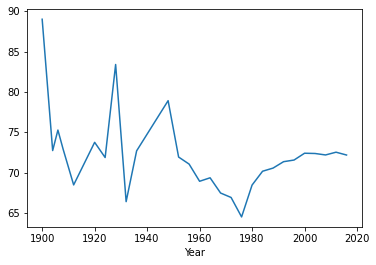

In [378]:
olympics.loc[olympics.Sport == 'Swimming']\
.groupby('Year').Weight.mean().plot();

3. What is the mean and standard deviation of the BMI of athletes in each sports discipline? The BMI can be computed as 

    $$BMI = Weight~/~\left(\frac{Height}{100}\right)^2$$

    with the values in this dataset. To solve this question, break it down into individual steps:
    - Calculate the BMI for all athletes
    - Group by 'Sport'
    - Calculate the mean and standard deviation of the BMI of the grouped data frame
    
    *Hint*: Use `*.agg([..., ...])` to apply "mean" and "std" (standard deviation) simultaneously.

In [381]:
olympics['BMI'] = \
olympics.Weight / (olympics.Height/100) ** 2

olympics

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,Year,Season,City,BMI
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,1992,Summer,Barcelona,24.691358
96,Mika Lauri Aarnikka,M,24.0,187.0,76.0,FIN,Sailing,Sailing Men's Two Person Dinghy,NaN,1992,Summer,Barcelona,21.733535
118,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,NOR,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,1992,Summer,Barcelona,21.913806
137,Arvi Aavik,M,22.0,185.0,106.0,EST,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,1992,Summer,Barcelona,30.971512
160,M'Bairo Abakar,M,31.0,NaN,NaN,CHA,Judo,Judo Men's Half-Middleweight,NaN,1992,Summer,Barcelona,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270473,Khristos Zoumis,M,NaN,NaN,NaN,GRE,Athletics,Athletics Men's Triple Jump,NaN,1896,Summer,Athina,NaN
270914,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,SUI,Gymnastics,Gymnastics Men's Horse Vault,Silver,1896,Summer,Athina,NaN
270915,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,SUI,Gymnastics,Gymnastics Men's Parallel Bars,Silver,1896,Summer,Athina,NaN
270916,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,SUI,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,1896,Summer,Athina,NaN


In [388]:
olympics.groupby('Sport').BMI.agg(['mean', 
                                   'std'])

,mean,std
Sport,,
Aeronautics,NaN,NaN
Alpine Skiing,23.801255,2.219729
Alpinism,NaN,NaN
Archery,23.202037,3.139277
Art Competitions,25.093782,3.661959
...,...,...
Tug-Of-War,27.467685,3.536557
Volleyball,22.460733,1.802740
Water Polo,24.586849,2.123657


### Exercise 6
1. What country has the most gold medals in wrestling?

In [392]:
olympics.loc[
    (olympics.Sport == 'Wrestling') 
    & (olympics.Medal == 'Gold'), 
    'Nationality'
].value_counts(
    sort = True, 
    ascending = False
).index[0]

'URS'

2. How many different types of events have ever been held for fencing?

In [393]:
olympics.loc[olympics.Sport == 'Fencing', 
             'Event'].nunique()

18